In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfcars = pd.read_csv("../data/mtcars.csv")
dfcars = dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()


,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
y = dfcars['mpg']

In [4]:
allX = dfcars.iloc[:, 2:]

In [5]:
allX.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We first of all need to separate the data into a training set and a test set. We can use train_test_split for this

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

In [8]:
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [11]:
model1.score(X_train, y_train)


0.7701379909791617

In [12]:
model1.score(X_test, y_test)

0.6879761857596269

In [13]:
X_train = allX_train[["hp"]]
X_test = allX_test[["hp"]]

In [14]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [15]:
model2.score(X_train, y_train)

0.650415775991287

In [16]:
model2.score(X_test, y_test)

0.3996010170101514

In [17]:
X_train = allX_train[["drat"]]
X_test = allX_test[["drat"]]

In [18]:
model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression()

In [19]:
model3.score(X_train, y_train)

0.45889832481878434

In [20]:
model3.score(X_test, y_test)

0.4652147268834995

In [21]:
X_train = allX_train[["wt","hp"]]
X_test = allX_test[["wt","hp"]]

In [22]:
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression()

In [23]:
model4.score(X_train, y_train)

0.8321502526033073

In [24]:
model4.score(X_test, y_test)

0.7880448439485949

# validation 

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

In [27]:
model5 = LinearRegression()
scores = cross_val_score(model5, X_train, y_train)
scores

array([0.10736385, 0.49488149, 0.86879651, 0.65179584, 0.73272638])

In [28]:
scores.mean()

0.5711128154689782

In [29]:
X_train = allX_train[["wt","hp"]]
X_test = allX_test[["wt","hp"]]

In [30]:
model6 = LinearRegression()
scores6 = cross_val_score(model5, X_train, y_train)
scores6

array([0.1262545 , 0.6744817 , 0.76712479, 0.76448681, 0.83404541])

In [31]:
scores6.mean()

0.6332786406507414

In [32]:
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]

In [33]:
model7 = LinearRegression()
scores7 = cross_val_score(model5, X_train, y_train)
scores7.mean()

0.6571279909053499

In [34]:
X_train = allX_train[["wt","hp","carb"]]
X_test = allX_test[["wt","hp","carb"]]

In [35]:
model8 = LinearRegression()
scores8 = cross_val_score(model5, X_train, y_train)
scores8.mean()

0.6036599344425265

In [36]:
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]
model7 = LinearRegression()
model7.fit(X_train, y_train)
model7.score(X_test, y_test)

0.7900492843805205

# Polynomial Regression Example

In [37]:
demo = np.array([1,2,3]).reshape(-1,1)
demo

array([[1],
       [2],
       [3]])

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
PolynomialFeatures(5).fit_transform(demo)

array([[  1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.,  32.],
       [  1.,   3.,   9.,  27.,  81., 243.]])

In [40]:
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

In [41]:
X_train_poly = PolynomialFeatures(2).fit_transform(X_train)
X_test_poly = PolynomialFeatures(2).fit_transform(X_test)

In [42]:
modelpoly2 = LinearRegression()
modelpoly2.fit(X_train_poly, y_train)

LinearRegression()

In [43]:
print(modelpoly2.score(X_train_poly, y_train))
print(modelpoly2.score(X_test_poly, y_test))

0.8548475030225509
0.682183940466357


In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
max_p = 10 
degrees = range(max_p+1)
train_scores = np.zeros(max_p+1)
test_scores = np.zeros(max_p+1)
error_train = np.zeros(max_p+1)
error_test = np.zeros(max_p+1)

In [46]:
for i in degrees:
    if i !=0:
        X_train_poly = PolynomialFeatures(i).fit_transform(X_train)
        X_test_poly = PolynomialFeatures(i).fit_transform(X_test)
        polymodel = LinearRegression()
        polymodel.fit(X_train_poly, y_train)
        prediction_on_training = polymodel.predict(X_train_poly)
        prediction_on_test = polymodel.predict(X_test_poly)
        error_train[i] = mean_squared_error(y_train, prediction_on_training)
        error_test[i] = mean_squared_error(y_test, prediction_on_test)
        train_scores[i] = polymodel.score(X_train_poly, y_train)
        test_scores[i] = polymodel.score(X_test_poly, y_test)
        

In [47]:
train_scores

array([0.        , 0.77013799, 0.8548475 , 0.85493705, 0.85535746,
       0.86830004, 0.87003984, 0.9023398 , 0.91029886, 0.91151736,
       0.9116272 ])

In [48]:
bestd = np.argmin(error_test[1:])+1

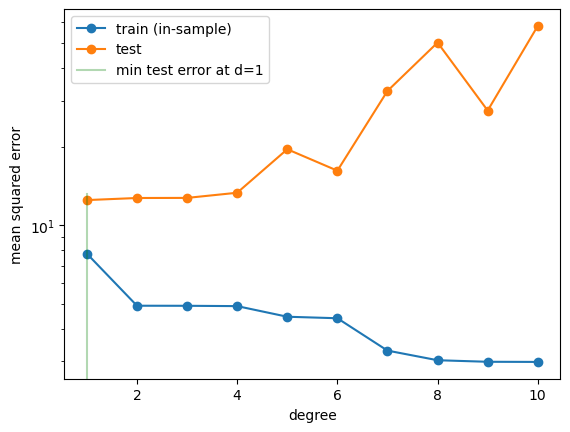

In [49]:
plt.plot(degrees[1:], error_train[1:], marker='o', label='train (in-sample)')
plt.plot(degrees[1:], error_test[1:], marker='o', label='test')
plt.axvline(bestd, 0,0.5, color='g', label="min test error at d=%d"%bestd, alpha=0.3)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")

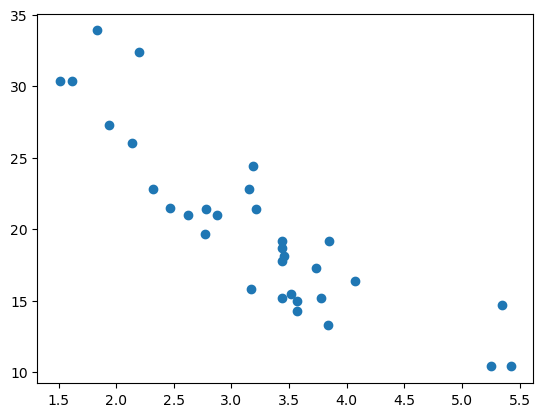

In [50]:
plt.scatter(dfcars["wt"],dfcars["mpg"])

__________________________

In [197]:
X = dfcars[['disp', 'hp', 'wt'] ] # Predictor variables (displacement, horsepower, weight)
y = dfcars['drat']                 # Target variable (miles per gallon)

# Split the data into training and test sets (e.g., 70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [198]:
X_v_train, X_v_valid, y_v_train, y_v_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [199]:
X_v_train.shape

(17, 3)

In [200]:
from sklearn.metrics import mean_squared_error

In [201]:
degrees = [0, 1, 2, 3, 4, 5]


In [202]:
error_train = np.empty(len(degrees))
error_valid = np.empty(len(degrees))
score_train = np.empty(len(degrees))
score_valid = np.empty(len(degrees))

# Loop through each polynomial degree
for i, d in enumerate(degrees):
    
    # Create polynomial features for the given degree
    poly = PolynomialFeatures(degree=d)
    X_c_train = poly.fit_transform(X_v_train)  # Transform the training set
    X_c_valid = poly.fit_transform(X_v_valid)  # Transform the validation set
    
    # Fit a linear regression model on the transformed training set
    model = LinearRegression()
    model.fit(X_c_train, y_v_train)
    
    # Make predictions on the transformed training and validation sets
    y_train_pred = model.predict(X_c_train)
    y_valid_pred = model.predict(X_c_valid)
    
    error_train[i] = mean_squared_error(y_v_train, y_train_pred)
    error_train[i] = mean_squared_error(y_v_valid, y_valid_pred)
    score_train[i] = model.score(X_c_train, y_v_train)
    score_valid[i] = model.score(X_c_valid, y_v_valid)
    
best_degree_index = np.argmin(error_valid)
best_degree = degrees[best_degree_index]

print(f"Best polynomial degree: {best_degree}")
print(f"Training MSE for best degree: {error_train[best_degree_index]}")
print(f"Validation MSE for best degree: {error_valid[best_degree_index]}")

Best polynomial degree: 1
Training MSE for best degree: 0.38470235888901494
Validation MSE for best degree: 0.3421670427789726


In [225]:
poly = PolynomialFeatures(degree=best_degree)
X_c_train_full = poly.fit_transform(X_train)  # Transform the entire training set
X_c_test = poly.fit_transform(X_test)         # Transform the test set

# Fit the model again
final_model = LinearRegression()
final_model.fit(X_c_train_full, y_train)

# Evaluate the model on the test set
y_test_pred = final_model.predict(X_c_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test set MSE: {test_mse}") 



Test set MSE: 5031.2910885656775


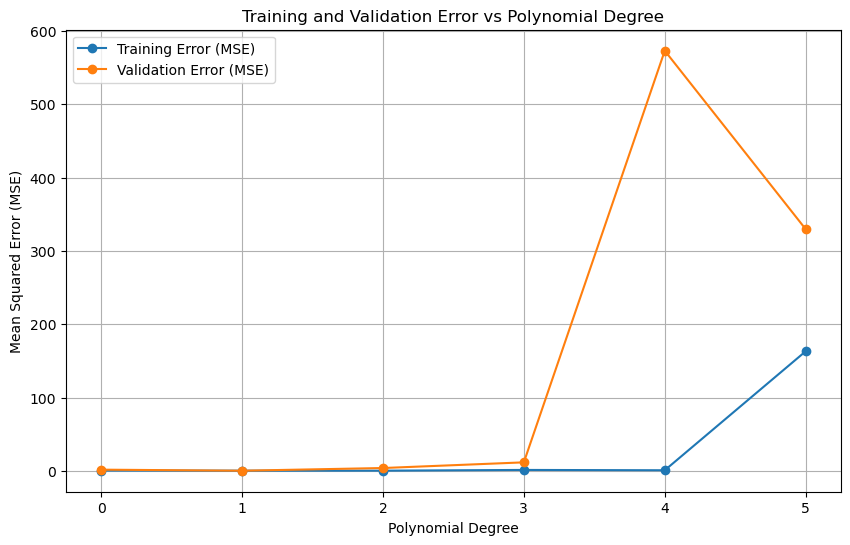

In [236]:


# Plot training and validation errors for each polynomial degree
plt.figure(figsize=(10,6))
plt.plot(degrees, error_train, label='Training Error (MSE)', marker='o')
plt.plot(degrees, error_valid, label='Validation Error (MSE)', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Error vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()


# The above section is research to be completed 

In [237]:
from sklearn import datasets
import pandas as pd

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Print the description of the dataset
print(diabetes.DESCR)

# Convert data to a pandas DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Optionally, add the target to the DataFrame
diabetes_df['target'] = diabetes.target

# Show the first few rows of the dataset
diabetes_df.head()


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [238]:
diabetes_df.isna()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
437,False,False,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False,False,False
439,False,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,False


In [239]:

X = diabetes_df[['bmi', 's1', 'age']]
y = diabetes.target  # Target remains the same

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model using 'bmi' and 'age'
modeln1 = LinearRegression()
modeln1.fit(X_train, y_train)

# Make predictions on the test set using the same features
y_pred = modeln1.predict(X_test)


In [240]:
modeln1.score(X_train, y_train)

0.3735822609218058

In [241]:
modeln1.score(X_test, y_test)

0.24267596966596972

In [242]:
modeln1 = LinearRegression()
scores = cross_val_score(modeln1, X_train, y_train)
scores

array([0.36072138, 0.18353408, 0.35093716, 0.48824233, 0.20185333])

In [243]:
scores.mean()

0.3170576559977962

In [244]:
X = diabetes_df[['s2', 's1']]
y = diabetes.target  # Target remains the same

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model using 'bmi' and 'age'
modeln2 = LinearRegression()
modeln2.fit(X_train, y_train)

# Make predictions on the test set using the same features
y_pred = modeln2.predict(X_test)

In [245]:
modeln2 = LinearRegression()
scores = cross_val_score(modeln2, X_train, y_train)
scores

array([ 0.06657238, -0.07252803,  0.0550877 ,  0.02917744, -0.07214748])

In [246]:
scores.mean()

0.0012324019034676726